In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Day_2_Stock_Data/All_Stocks_Data.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Symbol,Asset_type,Name
0,2024-01-16,22080.500000,22124.150391,21969.800781,22032.300781,292400,^NSEI,Index,NIFTY_50
1,2024-01-17,21647.250000,21851.500000,21550.449219,21571.949219,456000,^NSEI,Index,NIFTY_50
2,2024-01-18,21414.199219,21539.400391,21285.550781,21462.250000,387300,^NSEI,Index,NIFTY_50
3,2024-01-19,21615.199219,21670.599609,21575.000000,21622.400391,343100,^NSEI,Index,NIFTY_50
4,2024-01-23,21716.699219,21750.250000,21192.599609,21238.800781,449700,^NSEI,Index,NIFTY_50


In [ ]:
nifty_df = df[df['Name'] == 'NIFTY_50'].copy()

In [ ]:
nifty_df.head()

,Date,Open,High,Low,Close,Volume,Symbol,Asset_type,Name
0,2024-01-16,22080.500000,22124.150391,21969.800781,22032.300781,292400,^NSEI,Index,NIFTY_50
1,2024-01-17,21647.250000,21851.500000,21550.449219,21571.949219,456000,^NSEI,Index,NIFTY_50
2,2024-01-18,21414.199219,21539.400391,21285.550781,21462.250000,387300,^NSEI,Index,NIFTY_50
3,2024-01-19,21615.199219,21670.599609,21575.000000,21622.400391,343100,^NSEI,Index,NIFTY_50
4,2024-01-23,21716.699219,21750.250000,21192.599609,21238.800781,449700,^NSEI,Index,NIFTY_50


In [ ]:
avg_volume = nifty_df['Volume'].mean()
print(avg_volume)

312948.78542510123


In [ ]:
threshold = 3 * avg_volume

In [ ]:
volume_anomalies = nifty_df[nifty_df['Volume'] > threshold]
print(volume_anomalies)

          Date     Open     High           Low    Close   Volume Symbol  \
91  2024-06-04  23179.5  23179.5  21281.449219  21884.5  1006100  ^NSEI   

   Asset_type      Name  
91      Index  NIFTY_50  


In [ ]:
volume_anomalies[['Date','Close','Volume']]

,Date,Close,Volume
91,2024-06-04,21884.5,1006100


In [ ]:
nifty_df['Daily_Return'] = nifty_df['Close'].pct_change() * 100

In [ ]:
nifty_df['Daily_Return']

0           NaN
1     -2.089439
2     -0.508527
3      0.746196
4     -1.774084
         ...   
489   -1.009536
490   -0.747961
491    0.416415
492   -0.224694
493   -0.259212
Name: Daily_Return, Length: 494, dtype: float64

In [ ]:
price_spikes = nifty_df[nifty_df['Daily_Return'].abs()>3]
price_spikes[['Date','Close','Daily_Return']]

,Date,Close,Daily_Return
90,2024-06-03,23263.900391,3.254232
91,2024-06-04,21884.500000,-5.929360
92,2024-06-05,22620.349609,3.362424
301,2025-04-07,22161.599609,-3.243255
322,2025-05-12,24924.699219,3.818307


In [ ]:
combined_anomalies = nifty_df[(nifty_df['Volume'] > threshold) & (nifty_df['Daily_Return'].abs()>3)]

In [ ]:
combined_anomalies[['Date','Close','Volume','Daily_Return']]

,Date,Close,Volume,Daily_Return
91,2024-06-04,21884.5,1006100,-5.92936


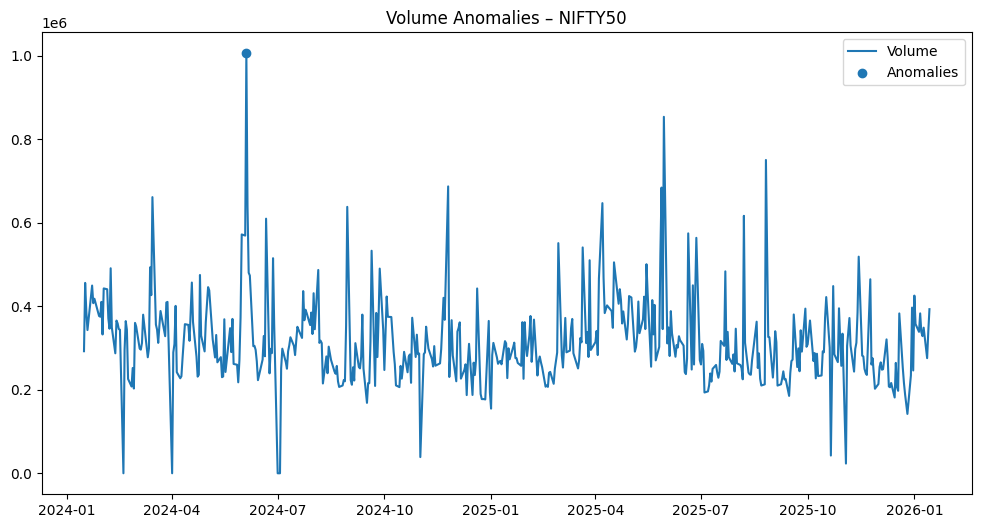

In [ ]:
nifty_df['Date'] = pd.to_datetime(nifty_df['Date'])
plt.figure(figsize=(12,6))
plt.plot(nifty_df["Date"], nifty_df["Volume"], label="Volume")

plt.scatter(
    volume_anomalies["Date"],
    volume_anomalies["Volume"],
    label="Anomalies", color='red'
)

plt.title("Volume Anomalies – NIFTY50")
plt.legend()
plt.show()
